In [1]:
import time_series_model as model_ts
from time_series_model import Model_Forecast

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
incidents = pd.read_csv('Incidents_treated.csv')
incidents

,Number roads affected,Number of incidents
0,25,14
1,22,10
2,43,17
3,24,7
4,69,31
...,...,...
115,45,36
116,53,37
117,43,37
118,31,23


In [3]:
# [-1, 1] for LSTM due to internal use of tanh by the memory cell
scaler_f = MinMaxScaler(feature_range = (-1, 1))
scaler_target = MinMaxScaler(feature_range = (-1, 1))

f = 'Number roads affected'
t = 'Number of incidents'

incidents[[f]] = scaler_f.fit_transform(incidents[[f]])
incidents[[t]] = scaler_target.fit_transform(incidents[[t]])
incidents

,Number roads affected,Number of incidents
0,-0.972915,-0.987149
1,-0.977192,-0.993574
2,-0.947256,-0.982329
3,-0.974341,-0.998394
4,-0.910192,-0.959839
...,...,...
115,-0.944405,-0.951807
116,-0.933001,-0.950201
117,-0.947256,-0.950201
118,-0.964362,-0.972691


In [5]:
incidents = incidents.drop(columns = 'Number roads affected')

In [6]:
# 24 hours that make the sequence
TIMESTEPS = 24

# number of features used by the model (using conf. cases to predict conf. cases)
FEATURES = len(incidents.columns)

# number of days to forecast - we will forecast the next 24 hours
MULTISTEPS = 24

# time series cross validator
CV_SPLITS = 10

EPOCHS = 30

# 24 hours (1 day)
# 168 hours (7 days)
BATCH_SIZE = 24

In [7]:
# our supervised problem
x, y = model_ts.to_supervised(incidents, TIMESTEPS)
print('Training shape:', x.shape)
print('Training labels shape:', y.shape)

Training shape: (95, 24, 1)
Training labels shape: (95, 1, 1)


Model: "LSTM_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 1024)          4202496   
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 128)           590336    
_________________________________________________________________
lstm_2 (LSTM)                (None, 24, 8)             4384      
_________________________________________________________________
dropout (Dropout)            (None, 24, 8)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               70144     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064 

_________________________________________________________________
dropout_20 (Dropout)         (None, 24, 128)           0         
_________________________________________________________________
dense_27 (Dense)             (None, 24, 8)             1032      
_________________________________________________________________
flatten_3 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               24704     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 1024)              66560     
_________________________________________________________________
dropout_22

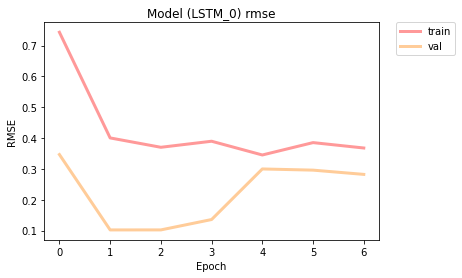

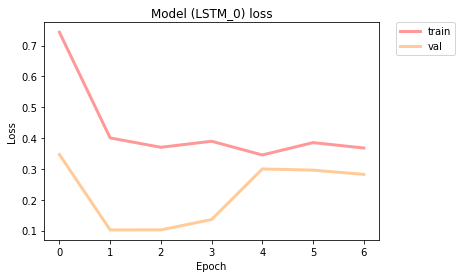

Epoch 1/30
2/2 [==============================] - 1s 514ms/step - loss: 0.2975 - mae: 0.2032 - rmse: 0.2322 - val_loss: 0.6370 - val_mae: 0.3892 - val_rmse: 0.6370
Epoch 2/30
2/2 [==============================] - 1s 442ms/step - loss: 0.3176 - mae: 0.2159 - rmse: 0.2608 - val_loss: 0.6455 - val_mae: 0.4027 - val_rmse: 0.6455
Epoch 3/30
2/2 [==============================] - 1s 448ms/step - loss: 0.3018 - mae: 0.2022 - rmse: 0.2216 - val_loss: 0.6554 - val_mae: 0.4182 - val_rmse: 0.6554
Epoch 4/30
2/2 [==============================] - 1s 457ms/step - loss: 0.3094 - mae: 0.1978 - rmse: 0.2345 - val_loss: 0.6650 - val_mae: 0.4328 - val_rmse: 0.6650
Epoch 5/30
2/2 [==============================] - 1s 453ms/step - loss: 0.3138 - mae: 0.2079 - rmse: 0.2268 - val_loss: 0.6744 - val_mae: 0.4467 - val_rmse: 0.6744
Epoch 6/30
2/2 [==============================] - 1s 478ms/step - loss: 0.3156 - mae: 0.2009 - rmse: 0.2210 - val_loss: 0.6828 - val_mae: 0.4592 - val_rmse: 0.6828
dict_keys(['loss

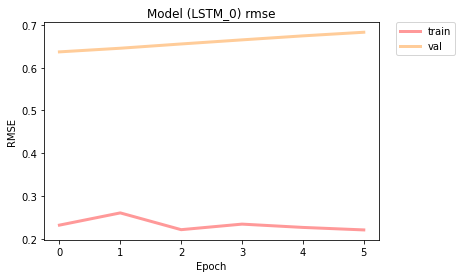

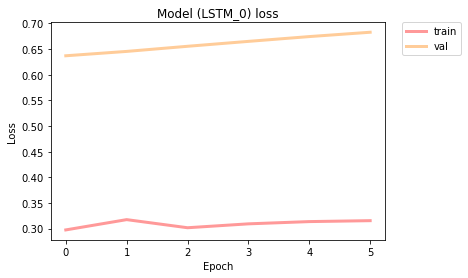

Epoch 1/30
2/2 [==============================] - 1s 614ms/step - loss: 0.3830 - mae: 0.2462 - rmse: 0.3944 - val_loss: 0.1228 - val_mae: 0.1046 - val_rmse: 0.1228
Epoch 2/30
2/2 [==============================] - 1s 689ms/step - loss: 0.3692 - mae: 0.2381 - rmse: 0.3827 - val_loss: 0.1213 - val_mae: 0.1023 - val_rmse: 0.1213
Epoch 3/30
2/2 [==============================] - 1s 580ms/step - loss: 0.3786 - mae: 0.2506 - rmse: 0.3887 - val_loss: 0.1222 - val_mae: 0.1038 - val_rmse: 0.1222
Epoch 4/30
2/2 [==============================] - 1s 572ms/step - loss: 0.3746 - mae: 0.2391 - rmse: 0.3843 - val_loss: 0.1260 - val_mae: 0.1096 - val_rmse: 0.1260
Epoch 5/30
2/2 [==============================] - 1s 596ms/step - loss: 0.3762 - mae: 0.2409 - rmse: 0.3866 - val_loss: 0.1331 - val_mae: 0.1210 - val_rmse: 0.1331
Epoch 6/30
2/2 [==============================] - 1s 597ms/step - loss: 0.3741 - mae: 0.2470 - rmse: 0.3842 - val_loss: 0.1442 - val_mae: 0.1362 - val_rmse: 0.1442
Epoch 7/30
2/2 [

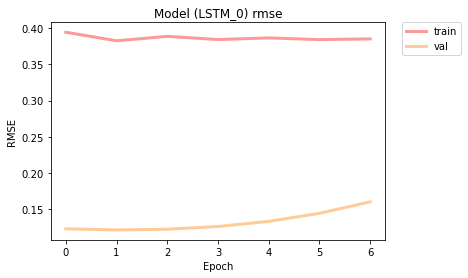

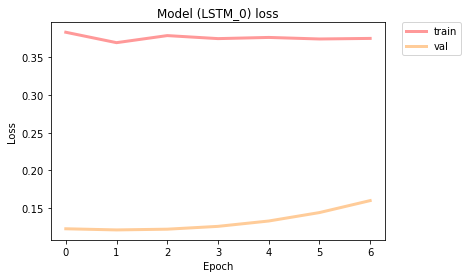

Epoch 1/30
3/3 [==============================] - 1s 498ms/step - loss: 0.3494 - mae: 0.2296 - rmse: 0.3030 - val_loss: 0.7308 - val_mae: 0.5479 - val_rmse: 0.7308
Epoch 2/30
3/3 [==============================] - 1s 474ms/step - loss: 0.3487 - mae: 0.2287 - rmse: 0.3165 - val_loss: 0.7215 - val_mae: 0.5354 - val_rmse: 0.7215
Epoch 3/30
3/3 [==============================] - 1s 498ms/step - loss: 0.3385 - mae: 0.2313 - rmse: 0.3043 - val_loss: 0.7228 - val_mae: 0.5372 - val_rmse: 0.7228
Epoch 4/30
3/3 [==============================] - 1s 499ms/step - loss: 0.3363 - mae: 0.2196 - rmse: 0.2829 - val_loss: 0.7291 - val_mae: 0.5455 - val_rmse: 0.7291
Epoch 5/30
3/3 [==============================] - 1s 480ms/step - loss: 0.3379 - mae: 0.2243 - rmse: 0.2772 - val_loss: 0.7367 - val_mae: 0.5555 - val_rmse: 0.7367
Epoch 6/30
3/3 [==============================] - 1s 484ms/step - loss: 0.3413 - mae: 0.2260 - rmse: 0.2939 - val_loss: 0.7448 - val_mae: 0.5661 - val_rmse: 0.7448
Epoch 7/30
3/3 [

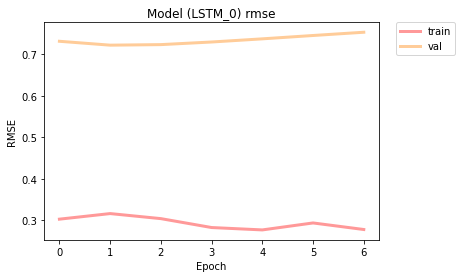

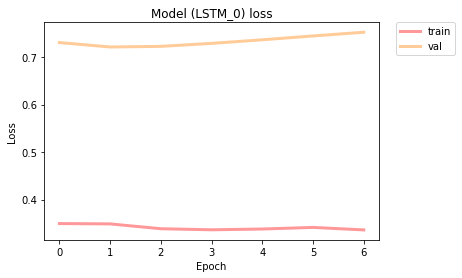

Epoch 1/30
3/3 [==============================] - 2s 589ms/step - loss: 0.4194 - mae: 0.2752 - rmse: 0.4394 - val_loss: 0.1469 - val_mae: 0.1263 - val_rmse: 0.1469
Epoch 2/30
3/3 [==============================] - 2s 565ms/step - loss: 0.4152 - mae: 0.2729 - rmse: 0.4364 - val_loss: 0.1518 - val_mae: 0.1338 - val_rmse: 0.1518
Epoch 3/30
3/3 [==============================] - 2s 517ms/step - loss: 0.4139 - mae: 0.2721 - rmse: 0.4325 - val_loss: 0.1657 - val_mae: 0.1526 - val_rmse: 0.1657
Epoch 4/30
3/3 [==============================] - 2s 519ms/step - loss: 0.3984 - mae: 0.2629 - rmse: 0.4166 - val_loss: 0.1912 - val_mae: 0.1832 - val_rmse: 0.1912
Epoch 5/30
3/3 [==============================] - 2s 523ms/step - loss: 0.4002 - mae: 0.2647 - rmse: 0.4199 - val_loss: 0.2270 - val_mae: 0.2216 - val_rmse: 0.2270
Epoch 6/30
3/3 [==============================] - 2s 518ms/step - loss: 0.3926 - mae: 0.2761 - rmse: 0.4094 - val_loss: 0.2628 - val_mae: 0.2577 - val_rmse: 0.2628
dict_keys(['loss

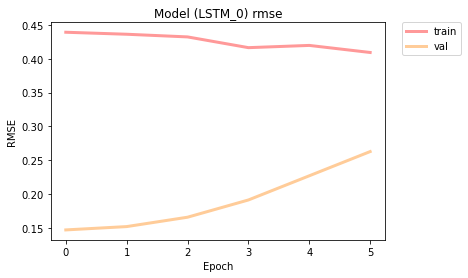

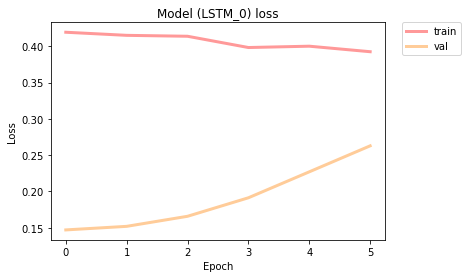


---------- Cross validation training model GRU_0 ----------

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.7580 - mae: 0.7266 - rmse: 0.7580 - val_loss: 0.6942 - val_mae: 0.6888 - val_rmse: 0.6942
Epoch 2/30
1/1 [==============================] - 0s 51ms/step - loss: 0.6028 - mae: 0.5682 - rmse: 0.6028 - val_loss: 0.5109 - val_mae: 0.5053 - val_rmse: 0.5109
Epoch 3/30
1/1 [==============================] - 0s 50ms/step - loss: 0.5079 - mae: 0.4535 - rmse: 0.5079 - val_loss: 0.3189 - val_mae: 0.3109 - val_rmse: 0.3189
Epoch 4/30
1/1 [==============================] - 0s 48ms/step - loss: 0.3671 - mae: 0.3032 - rmse: 0.3671 - val_loss: 0.1633 - val_mae: 0.1456 - val_rmse: 0.1633
Epoch 5/30
1/1 [==============================] - 0s 48ms/step - loss: 0.3303 - mae: 0.2261 - rmse: 0.3303 - val_loss: 0.0935 - val_mae: 0.0911 - val_rmse: 0.0935
Epoch 6/30
1/1 [==============================] - 0s 48ms/step - loss: 0.3844 - mae: 0.2388 - rmse: 0.3844 - val_loss: 0.0855

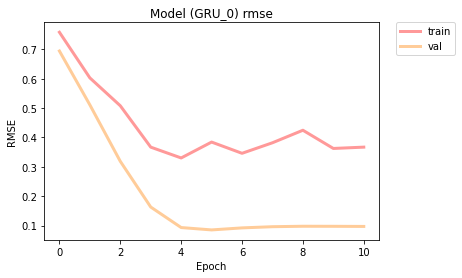

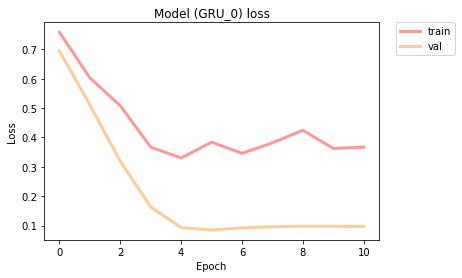

Epoch 1/30
2/2 [==============================] - 0s 87ms/step - loss: 0.2947 - mae: 0.1855 - rmse: 0.2268 - val_loss: 0.6468 - val_mae: 0.3868 - val_rmse: 0.6468
Epoch 2/30
2/2 [==============================] - 0s 49ms/step - loss: 0.3318 - mae: 0.2167 - rmse: 0.2439 - val_loss: 0.6471 - val_mae: 0.3872 - val_rmse: 0.6471
Epoch 3/30
2/2 [==============================] - 0s 46ms/step - loss: 0.2968 - mae: 0.1939 - rmse: 0.2375 - val_loss: 0.6479 - val_mae: 0.3882 - val_rmse: 0.6479
Epoch 4/30
2/2 [==============================] - 0s 47ms/step - loss: 0.3494 - mae: 0.2383 - rmse: 0.3074 - val_loss: 0.6495 - val_mae: 0.3900 - val_rmse: 0.6495
Epoch 5/30
2/2 [==============================] - 0s 48ms/step - loss: 0.3177 - mae: 0.2037 - rmse: 0.2553 - val_loss: 0.6515 - val_mae: 0.3923 - val_rmse: 0.6515
Epoch 6/30
2/2 [==============================] - 0s 46ms/step - loss: 0.3251 - mae: 0.2148 - rmse: 0.2471 - val_loss: 0.6538 - val_mae: 0.3949 - val_rmse: 0.6538
dict_keys(['loss', 'ma

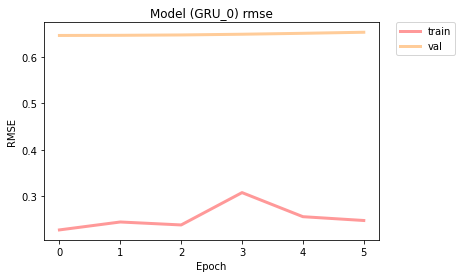

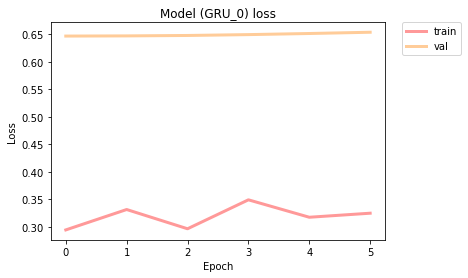

Epoch 1/30
2/2 [==============================] - 0s 87ms/step - loss: 0.3763 - mae: 0.2227 - rmse: 0.3871 - val_loss: 0.0842 - val_mae: 0.0734 - val_rmse: 0.0842
Epoch 2/30
2/2 [==============================] - 0s 47ms/step - loss: 0.3740 - mae: 0.2289 - rmse: 0.3878 - val_loss: 0.0837 - val_mae: 0.0724 - val_rmse: 0.0837
Epoch 3/30
2/2 [==============================] - 0s 47ms/step - loss: 0.3939 - mae: 0.2442 - rmse: 0.4046 - val_loss: 0.0834 - val_mae: 0.0725 - val_rmse: 0.0834
Epoch 4/30
2/2 [==============================] - 0s 48ms/step - loss: 0.3802 - mae: 0.2361 - rmse: 0.3925 - val_loss: 0.0835 - val_mae: 0.0737 - val_rmse: 0.0835
Epoch 5/30
2/2 [==============================] - 0s 46ms/step - loss: 0.4015 - mae: 0.2523 - rmse: 0.4081 - val_loss: 0.0839 - val_mae: 0.0753 - val_rmse: 0.0839
Epoch 6/30
2/2 [==============================] - 0s 48ms/step - loss: 0.3696 - mae: 0.2291 - rmse: 0.3811 - val_loss: 0.0848 - val_mae: 0.0780 - val_rmse: 0.0848
Epoch 7/30
2/2 [======

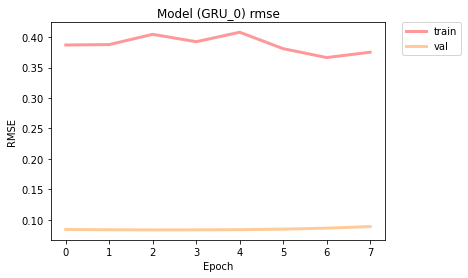

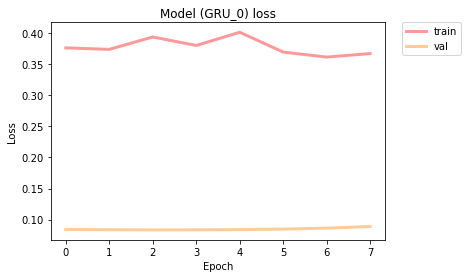

Epoch 1/30
3/3 [==============================] - 0s 49ms/step - loss: 0.3280 - mae: 0.1967 - rmse: 0.2606 - val_loss: 0.6999 - val_mae: 0.5145 - val_rmse: 0.6999
Epoch 2/30
3/3 [==============================] - 0s 28ms/step - loss: 0.3540 - mae: 0.2212 - rmse: 0.3102 - val_loss: 0.6940 - val_mae: 0.5071 - val_rmse: 0.6940
Epoch 3/30
3/3 [==============================] - 0s 28ms/step - loss: 0.3201 - mae: 0.2034 - rmse: 0.2575 - val_loss: 0.6902 - val_mae: 0.5023 - val_rmse: 0.6902
Epoch 4/30
3/3 [==============================] - 0s 27ms/step - loss: 0.3653 - mae: 0.2352 - rmse: 0.2943 - val_loss: 0.6882 - val_mae: 0.4997 - val_rmse: 0.6882
Epoch 5/30
3/3 [==============================] - 0s 28ms/step - loss: 0.3306 - mae: 0.2200 - rmse: 0.2864 - val_loss: 0.6867 - val_mae: 0.4977 - val_rmse: 0.6867
Epoch 6/30
3/3 [==============================] - 0s 29ms/step - loss: 0.3481 - mae: 0.2153 - rmse: 0.2882 - val_loss: 0.6870 - val_mae: 0.4981 - val_rmse: 0.6870
Epoch 7/30
3/3 [======

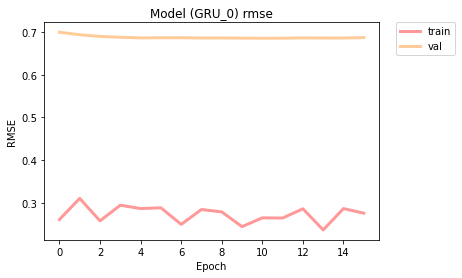

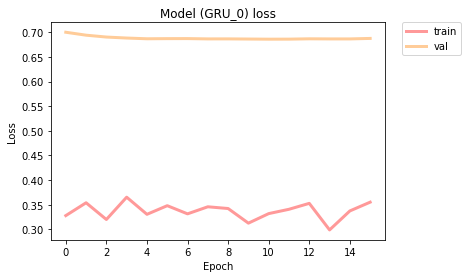

Epoch 1/30
3/3 [==============================] - 0s 50ms/step - loss: 0.4150 - mae: 0.2448 - rmse: 0.4331 - val_loss: 0.0725 - val_mae: 0.0642 - val_rmse: 0.0725
Epoch 2/30
3/3 [==============================] - 0s 29ms/step - loss: 0.3749 - mae: 0.2261 - rmse: 0.3887 - val_loss: 0.0770 - val_mae: 0.0688 - val_rmse: 0.0770
Epoch 3/30
3/3 [==============================] - 0s 27ms/step - loss: 0.4140 - mae: 0.2537 - rmse: 0.4326 - val_loss: 0.0852 - val_mae: 0.0769 - val_rmse: 0.0852
Epoch 4/30
3/3 [==============================] - 0s 28ms/step - loss: 0.3857 - mae: 0.2407 - rmse: 0.4063 - val_loss: 0.0968 - val_mae: 0.0879 - val_rmse: 0.0968
Epoch 5/30
3/3 [==============================] - 0s 30ms/step - loss: 0.4063 - mae: 0.2617 - rmse: 0.4231 - val_loss: 0.1108 - val_mae: 0.1009 - val_rmse: 0.1108
Epoch 6/30
3/3 [==============================] - 0s 28ms/step - loss: 0.3927 - mae: 0.2440 - rmse: 0.4066 - val_loss: 0.1266 - val_mae: 0.1154 - val_rmse: 0.1266
dict_keys(['loss', 'ma

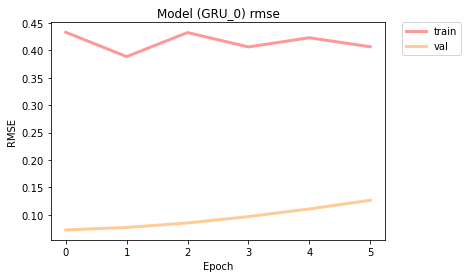

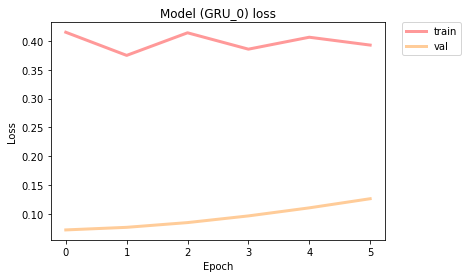


---------- Cross validation training model CNN_0 ----------

Epoch 1/30
1/1 [==============================] - 1s 913ms/step - loss: 0.7646 - mae: 0.7104 - rmse: 0.7646 - val_loss: 0.2385 - val_mae: 0.2113 - val_rmse: 0.2385
Epoch 2/30
1/1 [==============================] - 0s 39ms/step - loss: 0.4589 - mae: 0.3606 - rmse: 0.4589 - val_loss: 0.1312 - val_mae: 0.1258 - val_rmse: 0.1312
Epoch 3/30
1/1 [==============================] - 0s 40ms/step - loss: 0.4429 - mae: 0.3212 - rmse: 0.4429 - val_loss: 0.1069 - val_mae: 0.1058 - val_rmse: 0.1069
Epoch 4/30
1/1 [==============================] - 0s 38ms/step - loss: 0.3251 - mae: 0.2731 - rmse: 0.3251 - val_loss: 0.1037 - val_mae: 0.0964 - val_rmse: 0.1037
Epoch 5/30
1/1 [==============================] - 0s 40ms/step - loss: 0.3212 - mae: 0.2623 - rmse: 0.3212 - val_loss: 0.1049 - val_mae: 0.0912 - val_rmse: 0.1049
Epoch 6/30
1/1 [==============================] - 0s 38ms/step - loss: 0.3324 - mae: 0.2406 - rmse: 0.3324 - val_loss: 0.1

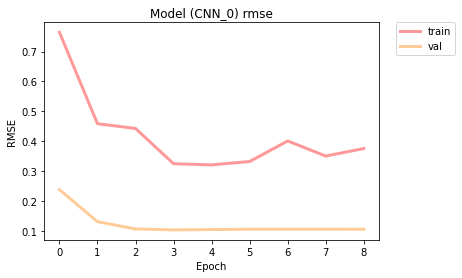

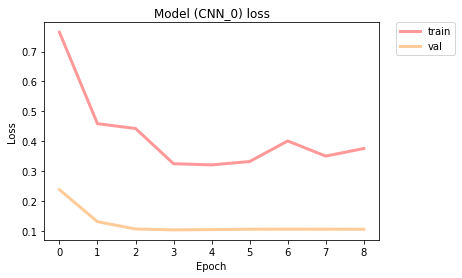

Epoch 1/30
2/2 [==============================] - 0s 80ms/step - loss: 0.3518 - mae: 0.2768 - rmse: 0.2365 - val_loss: 0.6409 - val_mae: 0.3919 - val_rmse: 0.6409
Epoch 2/30
2/2 [==============================] - 0s 69ms/step - loss: 0.3045 - mae: 0.2068 - rmse: 0.2363 - val_loss: 0.6420 - val_mae: 0.3937 - val_rmse: 0.6420
Epoch 3/30
2/2 [==============================] - 0s 59ms/step - loss: 0.3604 - mae: 0.2506 - rmse: 0.2916 - val_loss: 0.6444 - val_mae: 0.3977 - val_rmse: 0.6444
Epoch 4/30
2/2 [==============================] - 0s 42ms/step - loss: 0.3469 - mae: 0.2567 - rmse: 0.2565 - val_loss: 0.6475 - val_mae: 0.4026 - val_rmse: 0.6475
Epoch 5/30
2/2 [==============================] - 0s 44ms/step - loss: 0.3444 - mae: 0.2642 - rmse: 0.2999 - val_loss: 0.6504 - val_mae: 0.4074 - val_rmse: 0.6504
Epoch 6/30
2/2 [==============================] - 0s 38ms/step - loss: 0.3597 - mae: 0.2471 - rmse: 0.2660 - val_loss: 0.6532 - val_mae: 0.4119 - val_rmse: 0.6532
dict_keys(['loss', 'ma

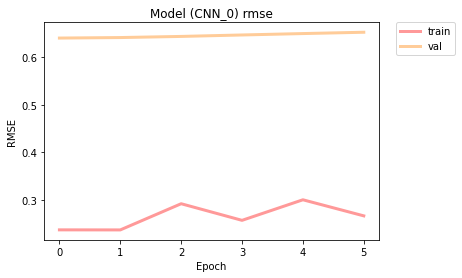

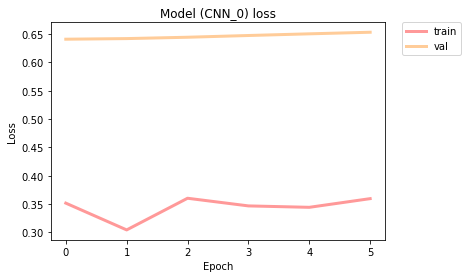

Epoch 1/30
2/2 [==============================] - 0s 89ms/step - loss: 0.3985 - mae: 0.3134 - rmse: 0.4005 - val_loss: 0.1363 - val_mae: 0.1204 - val_rmse: 0.1363
Epoch 2/30
2/2 [==============================] - 0s 37ms/step - loss: 0.4288 - mae: 0.2987 - rmse: 0.4376 - val_loss: 0.1348 - val_mae: 0.1183 - val_rmse: 0.1348
Epoch 3/30
2/2 [==============================] - 0s 37ms/step - loss: 0.4300 - mae: 0.2891 - rmse: 0.4375 - val_loss: 0.1336 - val_mae: 0.1168 - val_rmse: 0.1336
Epoch 4/30
2/2 [==============================] - 0s 39ms/step - loss: 0.4050 - mae: 0.2825 - rmse: 0.4069 - val_loss: 0.1326 - val_mae: 0.1157 - val_rmse: 0.1326
Epoch 5/30
2/2 [==============================] - 0s 39ms/step - loss: 0.4383 - mae: 0.3020 - rmse: 0.4482 - val_loss: 0.1320 - val_mae: 0.1149 - val_rmse: 0.1320
Epoch 6/30
2/2 [==============================] - 0s 36ms/step - loss: 0.3984 - mae: 0.2681 - rmse: 0.4038 - val_loss: 0.1317 - val_mae: 0.1145 - val_rmse: 0.1317
Epoch 7/30
2/2 [======

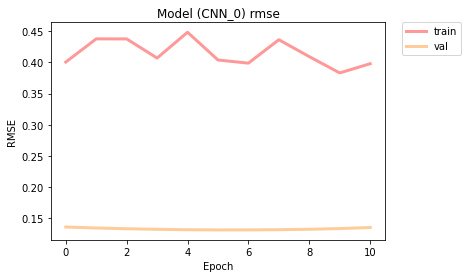

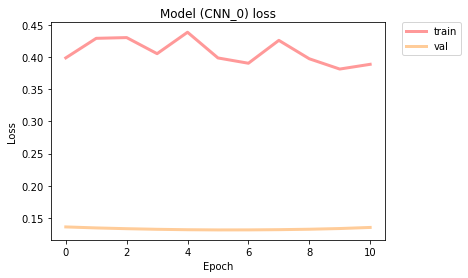

Epoch 1/30
3/3 [==============================] - 0s 41ms/step - loss: 0.3761 - mae: 0.2565 - rmse: 0.3125 - val_loss: 0.7446 - val_mae: 0.5635 - val_rmse: 0.7446
Epoch 2/30
3/3 [==============================] - 0s 20ms/step - loss: 0.3425 - mae: 0.2422 - rmse: 0.3253 - val_loss: 0.7422 - val_mae: 0.5603 - val_rmse: 0.7422
Epoch 3/30
3/3 [==============================] - 0s 18ms/step - loss: 0.3469 - mae: 0.2418 - rmse: 0.2793 - val_loss: 0.7417 - val_mae: 0.5596 - val_rmse: 0.7417
Epoch 4/30
3/3 [==============================] - 0s 19ms/step - loss: 0.3780 - mae: 0.2413 - rmse: 0.3719 - val_loss: 0.7426 - val_mae: 0.5608 - val_rmse: 0.7426
Epoch 5/30
3/3 [==============================] - 0s 20ms/step - loss: 0.3638 - mae: 0.2506 - rmse: 0.3928 - val_loss: 0.7442 - val_mae: 0.5630 - val_rmse: 0.7442
Epoch 6/30
3/3 [==============================] - 0s 20ms/step - loss: 0.3369 - mae: 0.2397 - rmse: 0.2877 - val_loss: 0.7471 - val_mae: 0.5669 - val_rmse: 0.7471
Epoch 7/30
3/3 [======

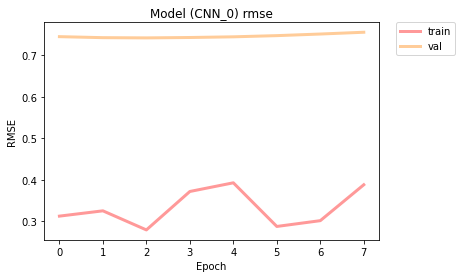

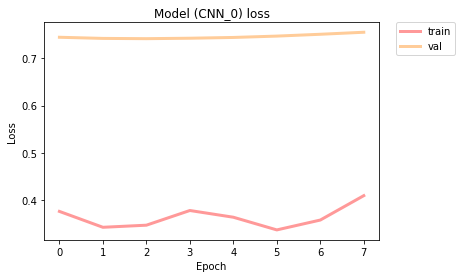

Epoch 1/30
3/3 [==============================] - 0s 42ms/step - loss: 0.4459 - mae: 0.3020 - rmse: 0.4686 - val_loss: 0.1424 - val_mae: 0.1179 - val_rmse: 0.1424
Epoch 2/30
3/3 [==============================] - 0s 19ms/step - loss: 0.4128 - mae: 0.3055 - rmse: 0.4300 - val_loss: 0.1404 - val_mae: 0.1153 - val_rmse: 0.1404
Epoch 3/30
3/3 [==============================] - 0s 20ms/step - loss: 0.4500 - mae: 0.3001 - rmse: 0.4678 - val_loss: 0.1401 - val_mae: 0.1150 - val_rmse: 0.1401
Epoch 4/30
3/3 [==============================] - 0s 20ms/step - loss: 0.4629 - mae: 0.3160 - rmse: 0.4799 - val_loss: 0.1408 - val_mae: 0.1158 - val_rmse: 0.1408
Epoch 5/30
3/3 [==============================] - 0s 21ms/step - loss: 0.4354 - mae: 0.2898 - rmse: 0.4575 - val_loss: 0.1421 - val_mae: 0.1175 - val_rmse: 0.1421
Epoch 6/30
3/3 [==============================] - 0s 22ms/step - loss: 0.4063 - mae: 0.2688 - rmse: 0.4178 - val_loss: 0.1445 - val_mae: 0.1212 - val_rmse: 0.1445
Epoch 7/30
3/3 [======

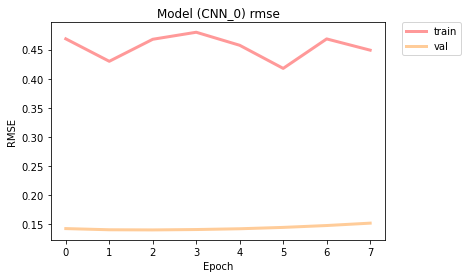

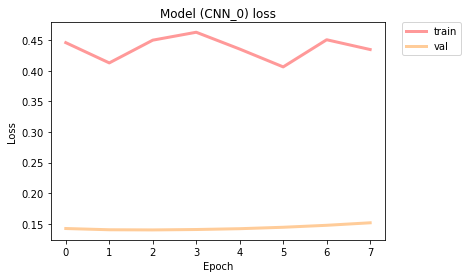


---------- Cross validation training model CNN_LSTM_0 ----------

Epoch 1/30
1/1 [==============================] - 10s 10s/step - loss: 0.7658 - mae: 0.7312 - rmse: 0.7658 - val_loss: 0.7174 - val_mae: 0.7098 - val_rmse: 0.7174
Epoch 2/30
1/1 [==============================] - 1s 530ms/step - loss: 0.6558 - mae: 0.6157 - rmse: 0.6558 - val_loss: 0.4417 - val_mae: 0.4292 - val_rmse: 0.4417
Epoch 3/30
1/1 [==============================] - 1s 569ms/step - loss: 0.4441 - mae: 0.3881 - rmse: 0.4441 - val_loss: 0.1302 - val_mae: 0.1242 - val_rmse: 0.1302
Epoch 4/30
1/1 [==============================] - 1s 514ms/step - loss: 0.3684 - mae: 0.2450 - rmse: 0.3684 - val_loss: 0.1159 - val_mae: 0.0803 - val_rmse: 0.1159
Epoch 5/30
1/1 [==============================] - 1s 510ms/step - loss: 0.4022 - mae: 0.2706 - rmse: 0.4022 - val_loss: 0.1330 - val_mae: 0.0835 - val_rmse: 0.1330
Epoch 6/30
1/1 [==============================] - 0s 486ms/step - loss: 0.4198 - mae: 0.2696 - rmse: 0.4198 - val_

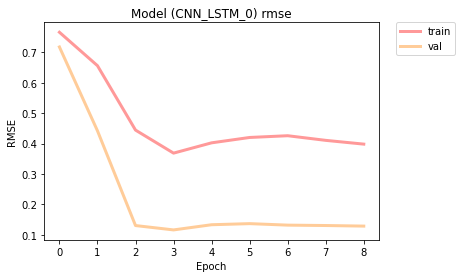

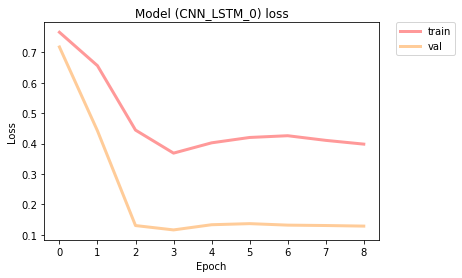

Epoch 1/30
2/2 [==============================] - 1s 482ms/step - loss: 0.3223 - mae: 0.2188 - rmse: 0.2598 - val_loss: 0.6782 - val_mae: 0.4483 - val_rmse: 0.6782
Epoch 2/30
2/2 [==============================] - 1s 431ms/step - loss: 0.3204 - mae: 0.2064 - rmse: 0.2130 - val_loss: 0.6793 - val_mae: 0.4500 - val_rmse: 0.6793
Epoch 3/30
2/2 [==============================] - 1s 442ms/step - loss: 0.3037 - mae: 0.2104 - rmse: 0.2201 - val_loss: 0.6819 - val_mae: 0.4541 - val_rmse: 0.6819
Epoch 4/30
2/2 [==============================] - 1s 439ms/step - loss: 0.3142 - mae: 0.2078 - rmse: 0.2059 - val_loss: 0.6856 - val_mae: 0.4597 - val_rmse: 0.6856
Epoch 5/30
2/2 [==============================] - 1s 432ms/step - loss: 0.3120 - mae: 0.2007 - rmse: 0.2183 - val_loss: 0.6896 - val_mae: 0.4657 - val_rmse: 0.6896
Epoch 6/30
2/2 [==============================] - 1s 433ms/step - loss: 0.2968 - mae: 0.1944 - rmse: 0.2147 - val_loss: 0.6939 - val_mae: 0.4722 - val_rmse: 0.6939
dict_keys(['loss

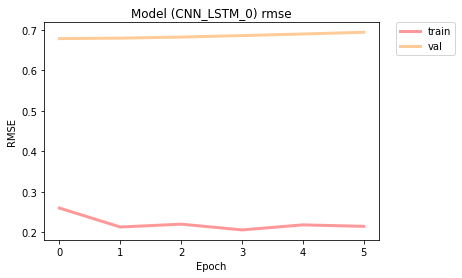

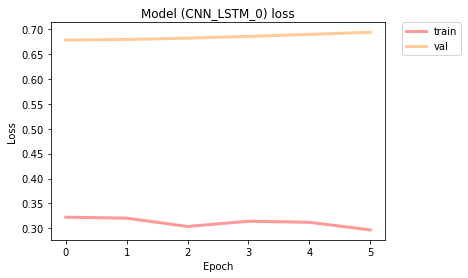

Epoch 1/30
2/2 [==============================] - 1s 565ms/step - loss: 0.3968 - mae: 0.2467 - rmse: 0.4061 - val_loss: 0.1166 - val_mae: 0.0901 - val_rmse: 0.1166
Epoch 2/30
2/2 [==============================] - 1s 501ms/step - loss: 0.4115 - mae: 0.2591 - rmse: 0.4226 - val_loss: 0.1165 - val_mae: 0.0895 - val_rmse: 0.1165
Epoch 3/30
2/2 [==============================] - 1s 507ms/step - loss: 0.4168 - mae: 0.2654 - rmse: 0.4264 - val_loss: 0.1170 - val_mae: 0.0911 - val_rmse: 0.1170
Epoch 4/30
2/2 [==============================] - 1s 502ms/step - loss: 0.3951 - mae: 0.2626 - rmse: 0.4043 - val_loss: 0.1185 - val_mae: 0.0953 - val_rmse: 0.1185
Epoch 5/30
2/2 [==============================] - 1s 503ms/step - loss: 0.3998 - mae: 0.2512 - rmse: 0.4110 - val_loss: 0.1218 - val_mae: 0.1018 - val_rmse: 0.1218
Epoch 6/30
2/2 [==============================] - 1s 498ms/step - loss: 0.4006 - mae: 0.2596 - rmse: 0.4104 - val_loss: 0.1270 - val_mae: 0.1098 - val_rmse: 0.1270
Epoch 7/30
2/2 [

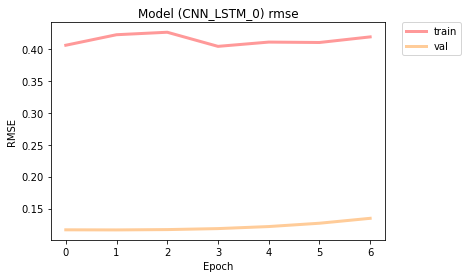

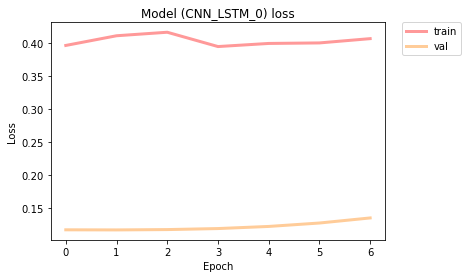

Epoch 1/30
3/3 [==============================] - 1s 461ms/step - loss: 0.3701 - mae: 0.2317 - rmse: 0.3275 - val_loss: 0.7712 - val_mae: 0.5977 - val_rmse: 0.7712
Epoch 2/30
3/3 [==============================] - 1s 440ms/step - loss: 0.3640 - mae: 0.2375 - rmse: 0.2892 - val_loss: 0.7639 - val_mae: 0.5881 - val_rmse: 0.7639
Epoch 3/30
3/3 [==============================] - 1s 483ms/step - loss: 0.3610 - mae: 0.2281 - rmse: 0.3113 - val_loss: 0.7612 - val_mae: 0.5846 - val_rmse: 0.7612
Epoch 4/30
3/3 [==============================] - 1s 492ms/step - loss: 0.3420 - mae: 0.2204 - rmse: 0.3068 - val_loss: 0.7619 - val_mae: 0.5855 - val_rmse: 0.7619
Epoch 5/30
3/3 [==============================] - 1s 439ms/step - loss: 0.3556 - mae: 0.2189 - rmse: 0.2913 - val_loss: 0.7645 - val_mae: 0.5889 - val_rmse: 0.7645
Epoch 6/30
3/3 [==============================] - 1s 433ms/step - loss: 0.3712 - mae: 0.2440 - rmse: 0.3067 - val_loss: 0.7694 - val_mae: 0.5953 - val_rmse: 0.7694
Epoch 7/30
3/3 [

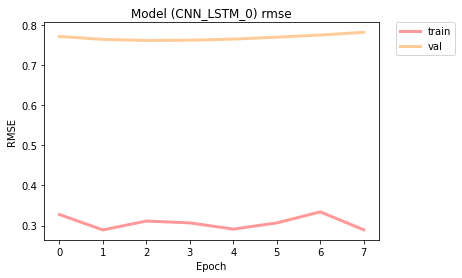

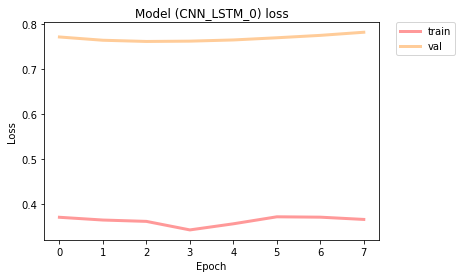

Epoch 1/30
3/3 [==============================] - 1s 496ms/step - loss: 0.4345 - mae: 0.2873 - rmse: 0.4518 - val_loss: 0.1352 - val_mae: 0.1115 - val_rmse: 0.1352
Epoch 2/30
3/3 [==============================] - 1s 470ms/step - loss: 0.4435 - mae: 0.2897 - rmse: 0.4612 - val_loss: 0.1380 - val_mae: 0.1154 - val_rmse: 0.1380
Epoch 3/30
3/3 [==============================] - 1s 470ms/step - loss: 0.4286 - mae: 0.2650 - rmse: 0.4470 - val_loss: 0.1484 - val_mae: 0.1291 - val_rmse: 0.1484
Epoch 4/30
3/3 [==============================] - 1s 471ms/step - loss: 0.4303 - mae: 0.2693 - rmse: 0.4487 - val_loss: 0.1681 - val_mae: 0.1545 - val_rmse: 0.1681
Epoch 5/30
3/3 [==============================] - 1s 468ms/step - loss: 0.4168 - mae: 0.2779 - rmse: 0.4373 - val_loss: 0.1966 - val_mae: 0.1881 - val_rmse: 0.1966
Epoch 6/30
3/3 [==============================] - 1s 470ms/step - loss: 0.3923 - mae: 0.2610 - rmse: 0.4093 - val_loss: 0.2330 - val_mae: 0.2266 - val_rmse: 0.2330
dict_keys(['loss

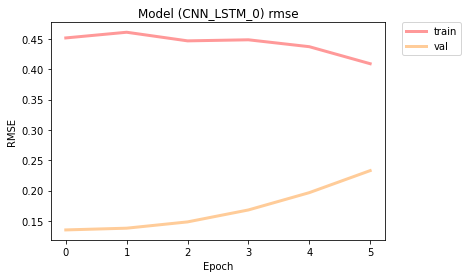

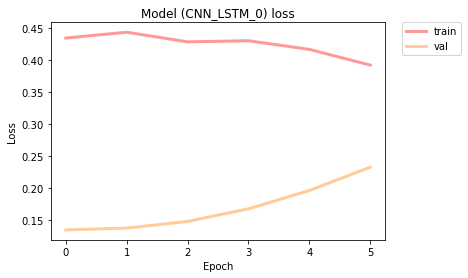


---------- Cross validation training model MLP_0 ----------

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.7687 - mae: 0.7289 - rmse: 0.7687 - val_loss: 0.1829 - val_mae: 0.1603 - val_rmse: 0.1829
Epoch 2/30
1/1 [==============================] - 0s 51ms/step - loss: 0.3775 - mae: 0.2728 - rmse: 0.3775 - val_loss: 0.4721 - val_mae: 0.4684 - val_rmse: 0.4721
Epoch 3/30
1/1 [==============================] - 0s 52ms/step - loss: 0.6935 - mae: 0.5705 - rmse: 0.6935 - val_loss: 0.1714 - val_mae: 0.1384 - val_rmse: 0.1714
Epoch 4/30
1/1 [==============================] - 0s 52ms/step - loss: 0.4577 - mae: 0.3058 - rmse: 0.4577 - val_loss: 0.1756 - val_mae: 0.1428 - val_rmse: 0.1756
Epoch 5/30
1/1 [==============================] - 0s 52ms/step - loss: 0.4648 - mae: 0.3111 - rmse: 0.4648 - val_loss: 0.1758 - val_mae: 0.1429 - val_rmse: 0.1758
Epoch 6/30
1/1 [==============================] - 0s 51ms/step - loss: 0.4652 - mae: 0.3115 - rmse: 0.4652 - val_loss: 0.1758

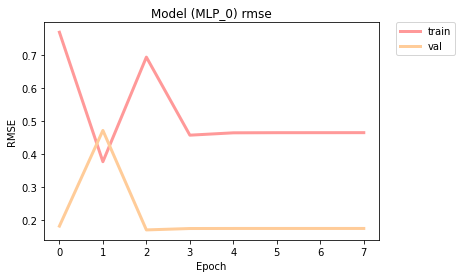

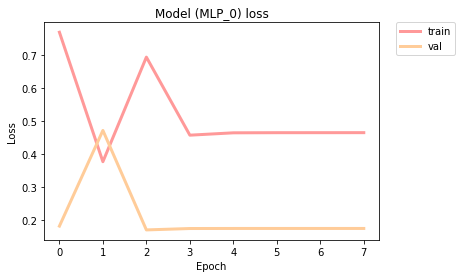

Epoch 1/30
2/2 [==============================] - 0s 90ms/step - loss: 0.3361 - mae: 0.2128 - rmse: 0.2038 - val_loss: 0.7368 - val_mae: 0.5362 - val_rmse: 0.7368
Epoch 2/30
2/2 [==============================] - 0s 46ms/step - loss: 0.3444 - mae: 0.2164 - rmse: 0.2067 - val_loss: 0.7377 - val_mae: 0.5371 - val_rmse: 0.7377
Epoch 3/30
2/2 [==============================] - 0s 47ms/step - loss: 0.3375 - mae: 0.2151 - rmse: 0.2009 - val_loss: 0.7381 - val_mae: 0.5375 - val_rmse: 0.7381
Epoch 4/30
2/2 [==============================] - 0s 47ms/step - loss: 0.3465 - mae: 0.2192 - rmse: 0.2085 - val_loss: 0.7384 - val_mae: 0.5377 - val_rmse: 0.7384
Epoch 5/30
2/2 [==============================] - 0s 49ms/step - loss: 0.3380 - mae: 0.2155 - rmse: 0.2020 - val_loss: 0.7384 - val_mae: 0.5378 - val_rmse: 0.7384
Epoch 6/30
2/2 [==============================] - 0s 47ms/step - loss: 0.3359 - mae: 0.2146 - rmse: 0.2114 - val_loss: 0.7383 - val_mae: 0.5378 - val_rmse: 0.7383
dict_keys(['loss', 'ma

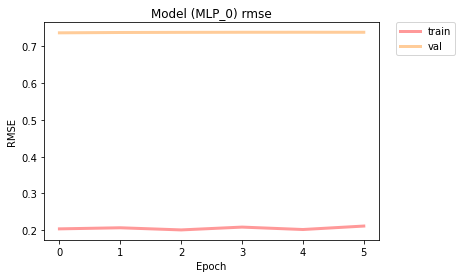

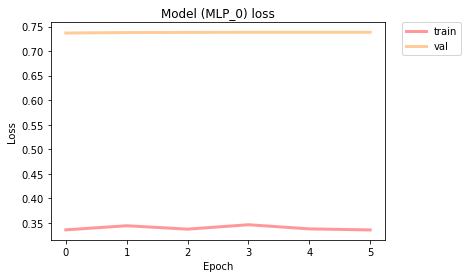

Epoch 1/30
2/2 [==============================] - 0s 93ms/step - loss: 0.4461 - mae: 0.2855 - rmse: 0.4577 - val_loss: 0.1379 - val_mae: 0.0813 - val_rmse: 0.1379
Epoch 2/30
2/2 [==============================] - 0s 52ms/step - loss: 0.4506 - mae: 0.2882 - rmse: 0.4628 - val_loss: 0.1377 - val_mae: 0.0811 - val_rmse: 0.1377
Epoch 3/30
2/2 [==============================] - 0s 52ms/step - loss: 0.4406 - mae: 0.2831 - rmse: 0.4537 - val_loss: 0.1372 - val_mae: 0.0804 - val_rmse: 0.1372
Epoch 4/30
2/2 [==============================] - 0s 51ms/step - loss: 0.4436 - mae: 0.2807 - rmse: 0.4547 - val_loss: 0.1364 - val_mae: 0.0793 - val_rmse: 0.1364
Epoch 5/30
2/2 [==============================] - 0s 52ms/step - loss: 0.4352 - mae: 0.2800 - rmse: 0.4491 - val_loss: 0.1346 - val_mae: 0.0772 - val_rmse: 0.1346
Epoch 6/30
2/2 [==============================] - 0s 52ms/step - loss: 0.4376 - mae: 0.2769 - rmse: 0.4489 - val_loss: 0.1316 - val_mae: 0.0735 - val_rmse: 0.1316
Epoch 7/30
2/2 [======

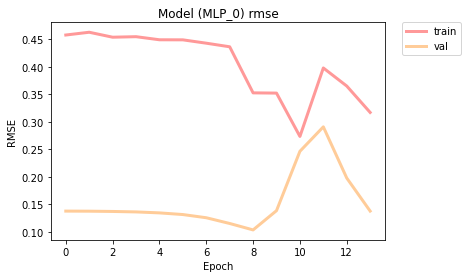

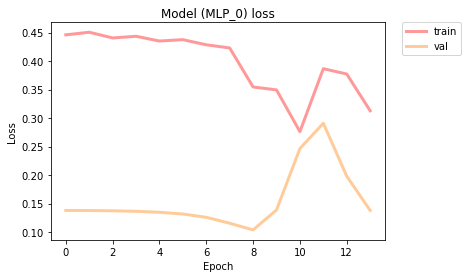

Epoch 1/30
3/3 [==============================] - 0s 54ms/step - loss: 0.3592 - mae: 0.2223 - rmse: 0.3004 - val_loss: 0.7214 - val_mae: 0.5897 - val_rmse: 0.7214
Epoch 2/30
3/3 [==============================] - 0s 35ms/step - loss: 0.3545 - mae: 0.2117 - rmse: 0.2845 - val_loss: 0.7429 - val_mae: 0.6092 - val_rmse: 0.7429
Epoch 3/30
3/3 [==============================] - 0s 34ms/step - loss: 0.3304 - mae: 0.2101 - rmse: 0.2469 - val_loss: 0.7447 - val_mae: 0.6109 - val_rmse: 0.7447
Epoch 4/30
3/3 [==============================] - 0s 32ms/step - loss: 0.3586 - mae: 0.2112 - rmse: 0.2855 - val_loss: 0.7386 - val_mae: 0.6059 - val_rmse: 0.7386
Epoch 5/30
3/3 [==============================] - 0s 32ms/step - loss: 0.3544 - mae: 0.2233 - rmse: 0.3017 - val_loss: 0.7331 - val_mae: 0.6019 - val_rmse: 0.7331
Epoch 6/30
3/3 [==============================] - 0s 34ms/step - loss: 0.3559 - mae: 0.2290 - rmse: 0.2686 - val_loss: 0.7245 - val_mae: 0.5955 - val_rmse: 0.7245
dict_keys(['loss', 'ma

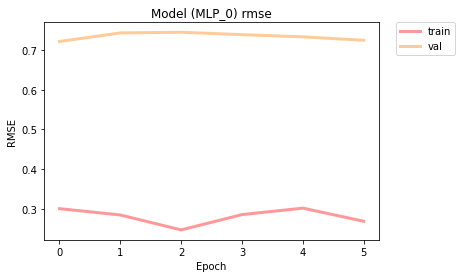

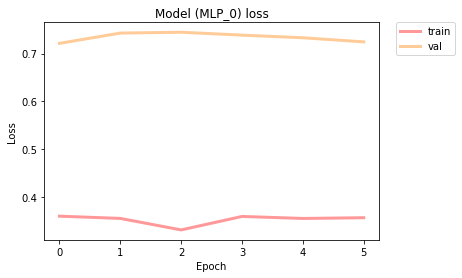

Epoch 1/30
3/3 [==============================] - 0s 58ms/step - loss: 0.4067 - mae: 0.2604 - rmse: 0.4247 - val_loss: 0.1752 - val_mae: 0.1068 - val_rmse: 0.1752
Epoch 2/30
3/3 [==============================] - 0s 34ms/step - loss: 0.4055 - mae: 0.2559 - rmse: 0.4230 - val_loss: 0.2557 - val_mae: 0.1632 - val_rmse: 0.2557
Epoch 3/30
3/3 [==============================] - 0s 36ms/step - loss: 0.3404 - mae: 0.2330 - rmse: 0.3471 - val_loss: 0.3895 - val_mae: 0.2714 - val_rmse: 0.3895
Epoch 4/30
3/3 [==============================] - 0s 34ms/step - loss: 0.3366 - mae: 0.2651 - rmse: 0.3414 - val_loss: 0.4316 - val_mae: 0.2905 - val_rmse: 0.4316
Epoch 5/30
3/3 [==============================] - 0s 35ms/step - loss: 0.2909 - mae: 0.2335 - rmse: 0.2923 - val_loss: 0.3928 - val_mae: 0.2281 - val_rmse: 0.3928
Epoch 6/30
3/3 [==============================] - 0s 35ms/step - loss: 0.3883 - mae: 0.2785 - rmse: 0.4033 - val_loss: 0.3791 - val_mae: 0.1961 - val_rmse: 0.3791
dict_keys(['loss', 'ma

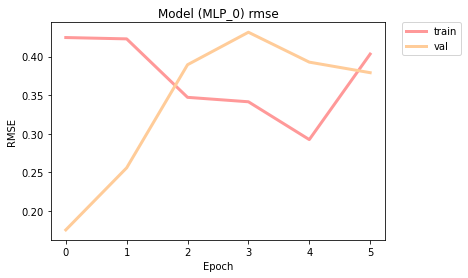

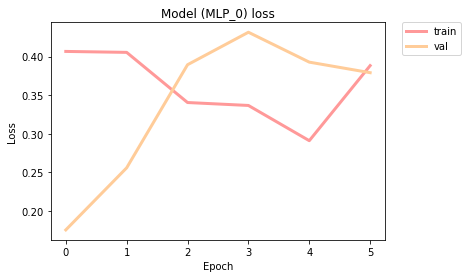

Model name: LSTM_0 with executing time: 47.92314 seconds
	With fitness: 0.32495
	RMSE: 0.34847
	MAE: 0.25438
	Loss: 0.34847
Model name: CNN_0 with executing time: 4.79715 seconds
	With fitness: 0.33426
	RMSE: 0.35812
	MAE: 0.26268
	Loss: 0.35812
Model name: GRU_0 with executing time: 7.38517 seconds
	With fitness: 0.37894
	RMSE: 0.40254
	MAE: 0.30816
	Loss: 0.40254
Model name: CNN_LSTM_0 with executing time: 47.36449 seconds
	With fitness: 0.40453
	RMSE: 0.42789
	MAE: 0.33444
	Loss: 0.42789
Model name: MLP_0 with executing time: 6.30683 seconds
	With fitness: 0.44487
	RMSE: 0.46923
	MAE: 0.37178
	Loss: 0.46923


In [8]:
final_model = model_ts.benchmarking(TIMESTEPS, FEATURES, x, y, EPOCHS, BATCH_SIZE, CV_SPLITS, 
                                    number_models_LSTM = 1, number_models_CNN = 1,
                                    number_models_LSTM_Stateful = 0, number_models_GRU = 1,
                                    number_models_CNN_LSTM = 1, number_models_MLP = 1)

In [9]:
final_model_2 = tf.keras.models.clone_model(final_model)

final_model = model_ts.fit_best_model(final_model, x, y, EPOCHS, BATCH_SIZE)

Epoch 1/30
4/4 [==============================] - 9s 488ms/step - loss: 0.3706 - mae: 0.2843 - rmse: 0.3700
Epoch 2/30
4/4 [==============================] - 2s 485ms/step - loss: 0.3676 - mae: 0.2308 - rmse: 0.3665
Epoch 3/30
4/4 [==============================] - 2s 487ms/step - loss: 0.3917 - mae: 0.2373 - rmse: 0.3905
Epoch 4/30
4/4 [==============================] - 2s 495ms/step - loss: 0.3782 - mae: 0.2389 - rmse: 0.3773
Epoch 5/30
4/4 [==============================] - 2s 485ms/step - loss: 0.3498 - mae: 0.2435 - rmse: 0.3492
Epoch 6/30
4/4 [==============================] - 2s 494ms/step - loss: 0.3483 - mae: 0.2435 - rmse: 0.3475
Epoch 7/30
4/4 [==============================] - 2s 485ms/step - loss: 0.3461 - mae: 0.2317 - rmse: 0.3452
Epoch 8/30
4/4 [==============================] - 2s 489ms/step - loss: 0.3543 - mae: 0.2306 - rmse: 0.3534
Epoch 9/30
4/4 [==============================] - 2s 501ms/step - loss: 0.3546 - mae: 0.2343 - rmse: 0.3537
Epoch 10/30
4/4 [===========

Real data: [ 32.  22.  25.  19.  19.  44.  51. 108. 203. 146. 124.  60.  51. 102.
 142.  82.  69.  51.  56.  36.  37.  37.  23.   7.]
Forecasting values: [110, 110, 110, 111, 111, 111, 112, 112, 112, 112, 112, 111, 111, 111, 111, 111, 111, 111, 110, 110, 110, 110, 110, 110]


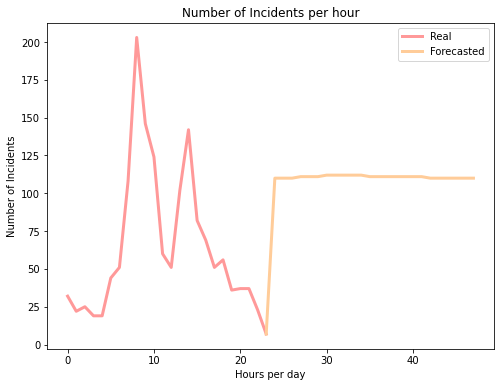

In [10]:
# Recursive Multi-step Forecast
forecasts = model_ts.forecast(final_model, incidents, scaler_target, 
                              TIMESTEPS, MULTISTEPS, FEATURES, BATCH_SIZE)

model_ts.plot_prediction(incidents, forecasts, scaler_target)